## Classical Perceptron using Iris Dataset

<img src="Images/perceptron_neuron.png" width="400" />

Frank Rosenblatt published the first concept of the Perceptron learning rule [1]. The algorithm modeled the Schedmatic of a biological neuron. The main idea was to define an algorithm in order to learn the values of the weights w that are then multiplied with the input features in order to make a decision whether a neuron fires or not. Thus, we can demonstrate this as follows.

<img src="Images/perceptron-learning-rule.jpg" width="400" />

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
iris = pd.read_csv("iris_data.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [46]:
y = iris.iloc[0:100, 4].values #Extracting 100 rows as array

In [47]:
X = np.array(iris.iloc[0:100,[0,2]])#Extracting 100 rows from columns 0,2
bias = np.ones((100,1))
X = np.hstack((bias,X))

In [48]:
y = np.where(y == 'setosa', -1, 1)

### Example of Linearly Seperable Data


<img src="Images/perceptron_binary.png" width="400" />

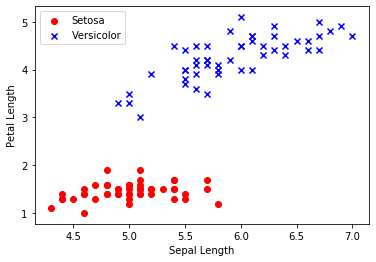

In [49]:
#Checking to see if linearly seperable data
%matplotlib inline
plt.scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 1], X[50:100, 2],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')

plt.show()

$$g(\mathbf{z}) =\begin{cases}
    1 & \text{if }\mathbf{z} \ge \theta\\
    -1 & \text{otherwise}.
  \end{cases} $$

In [50]:
# Set perceptron hypothesis: h(x) = sign(w^T*x)
def h(weight_vector, data_vector):
    """ Sign Function.
    
    Keyword arguments:
        weights     -- real valued numpy array
        data_vector -- real valued numpy array
        
    Output:
        x in {-1, 1}
    
    """
    if weight_vector @ data_vector > 0:
        return 1
    else:
        return -1

In [51]:

def PLA(input_data, input_labels, iterations):
    """ Perceptron Learning Algorithm.
    
    Keyword arguments:
        input_data   -- list of real valued data points stored as numpy arrays
        input_labels -- list of elements from {1, -1} 
        iterations   -- number of iterations of the perceptron update rule (default 1000)
        
    Output:
        weights      -- three dimensional weight vector stored as a numpy array 
    
    """
    
    weights = np.random.rand(3)
    number_of_data_entries = len(input_labels)
    
    PLA.errors_ = []
    
    errors = 0
    for _ in range(iterations):
        i = np.random.randint(number_of_data_entries)
        if h(weights, input_data[i]) != input_labels[i]:
            weights += input_labels[i]*input_data[i]
            errors += 1
            PLA.errors_.append(errors)
    
    PLA.weights = weights
    return weights


In [52]:
w = PLA(X, y, 1000)


Text(0, 0.5, 'Number of updates')

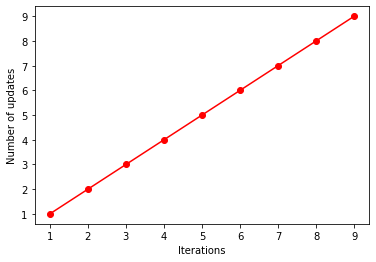

In [10]:
plt.plot(range(1, len(PLA.errors_) + 1), PLA.errors_, marker='o', color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Number of updates')


In [11]:
def predict(w, i):
    if h(w, X[i]) == -1:
        return 'Setosa'
    else:
        return 'Versicolor'

In [16]:
predict(w, 0)

'Setosa'

In [13]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


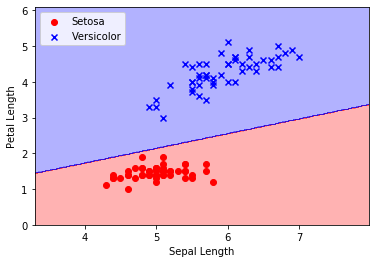

In [17]:
from matplotlib.colors import ListedColormap
BIG = []
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                           np.arange(x2_min, x2_max, .02))
Z = np.array([xx1.ravel(), xx2.ravel()]).T
bias = np.ones((len(Z),1))
Z = np.hstack((bias,Z))
for i in range(len(np.array([xx1.ravel(), xx2.ravel()]).T)):
    if h(w, Z[i]) == -1:
        BIG.append(-1)
    else:
        BIG.append(1)
        
BIG = np.array(BIG)
Z = BIG.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 1], X[50:100, 2],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')

plt.show()

In [15]:
np.shape(Z)

(305, 235)

### Sklearn Model 

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [9]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.98


#### References:
F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957